In [1795]:
from PIL import Image,ImageDraw
import random
import pandas as pd
import tensorflow as tf
import glob
import numpy as np
from math import pi
import random
import matplotlib.pyplot as plt
%matplotlib inline
img = Image.new('RGB', (128, 128), "white") #создание изображения 128*128
lineDrawer = ImageDraw.Draw(img)

### Dataset generator

In [1793]:
def draw_rectangle(draw, coordinates, color, width=1):
    for i in range(width):
        rect_start = (coordinates[0][0] - i, coordinates[0][1] - i)
        rect_end = (coordinates[1][0] + i, coordinates[1][1] + i)
        draw.rectangle((rect_start, rect_end), outline = color)

In [1759]:
def dataset_generator(imgs_num):
    rotated_images = []
    angles = []
    for _ in range(imgs_num):
        rectag_num = random.randint(1,10)
        random_angle = random.uniform(-10,10)
        img = Image.new('RGB', (128, 128), "white") #создание изображения 128*128
        lineDrawer = ImageDraw.Draw(img)
        drawing = ImageDraw.Draw(img)
        for _ in range(rectag_num):
            width = random.randint(1,5)
            x = random.uniform(0.1,1)*128
            y = random.uniform(0.1,1)*128
            #lineDrawer.rectangle(((x,y),(random.uniform(0,x-0.1*128),random.uniform(0,y-0.1*128))), outline = "black")
            drawing = ImageDraw.Draw(img)
            draw_rectangle(drawing,((x,y),(random.uniform(0.1*128,x-0.1*128),random.uniform(0.1*128,y-0.1*128))), color = "black",width=width)
        
        im2 = img.convert('RGBA')
        rotated = im2.rotate(random_angle, resample=Image.BICUBIC)
        fff = Image.new('RGBA', rotated.size)
        out = Image.composite(rotated, fff, rotated)
        out.convert('RGB')#img.mode
        rotated_images.append(out)
        angles.append(random_angle)
    yield  rotated_images,angles
        

In [1908]:
for (x,y) in dataset_generator(100):
    x_train = x
    y_train = y

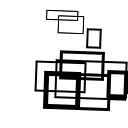

In [1909]:
x_train[9]

In [1910]:
train_array = []
for el in x_train:
    train_array.append(np.asarray(el))
train_array = np.asarray(train_array)/255.
y_train = np.asarray(y_train)

In [1912]:
print(train_array.shape)
print(y_train.shape)

(100, 128, 128, 4)
(100,)


In [1923]:
y_train = y_train.reshape(100,1)

In [1778]:
#масштабирование
#img = np.expand_dims(img, -1)
#img = np.expand_dims(img, 0)

In [1927]:
X = tf.placeholder(tf.float32, shape=[None,128,128,4])
Y = tf.placeholder(tf.float32, shape=[None,1])

#слои свертки и пулинга
conv1 = tf.layers.conv2d(inputs=X, filters=8, kernel_size=[2,2], padding="same", activation=tf.nn.relu)
pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
conv2 = tf.layers.conv2d(inputs=pool1,filters=4,kernel_size=[2,2],padding="same",activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

#полносвязный слой
flattened = tf.contrib.layers.flatten(pool2)

w1 = tf.Variable(tf.random_normal(shape=[4096,1])) 
b1 = tf.Variable(tf.zeros(shape = [1]))
out = tf.add(tf.matmul(flattened,w1),b1)

#loss = tf.reduce_sum(tf.pow(out - Y, 2))/2*20
loss = tf.losses.mean_squared_error(labels=Y, predictions=out)
train_step = tf.train.AdamOptimizer(0.001).minimize(loss)#tf.train.GradientDescentOptimizer 

In [1914]:
flattened #размер вектора

<tf.Tensor 'Flatten_71/Reshape:0' shape=(?, 4096) dtype=float32>

In [1928]:
training_epochs = 10000

In [1929]:
#Инициализация
init = tf.global_variables_initializer()
#Обучение
sss = tf.Session()
sss.run(init)

for epoch in range(training_epochs):
    permutation=np.random.permutation(100)
    permutation=permutation[0:20]
    batch=[train_array[permutation], y_train[permutation]]
    if epoch % 100 == 0:
        #print(sss.run(w1, feed_dict={X:batch[0], Y: batch[1]}))
        print(sss.run(loss, feed_dict={X:batch[0], Y: batch[1]}))
        
    sss.run(train_step, feed_dict={X:batch[0], Y: batch[1]})

print("Optimization Finished!")

400.187
23.8753
9.08032
4.14745
2.85024
2.28766
1.84478
1.33727
0.916896
0.674992
1.01368
1.22845
0.832172
0.360804
0.202385
0.449659
0.249857
0.349615
0.0829867
0.139945
0.204992
0.188588
0.0840396
0.043094
0.0753635
0.09094
0.046141
0.031751
0.0487515
0.0929877
0.0276443
0.0107829
0.0133992
0.0220387
0.029925
0.00736955
0.0132867
0.00815203
0.00499792
0.00951417
0.00765693
0.022993
0.00224889
0.00530263
0.00262256
0.00114883
0.00171781
0.00364289
0.00205478
0.00464926
0.00234556
0.00283125
0.00108247
0.00226501
0.00615036
0.00100197
0.00082839
0.00123402
0.0020985
0.00214928
0.0134238
0.000782392
0.00142385
0.00352906
0.000687073
0.0158545
0.00211581
0.000744044
0.0695445
0.00511275
0.00652034
0.000460627
0.000136989
0.0015281
5.79082e-05
0.000662299
0.00252202
0.00147075
0.00737634
0.00950631
0.000144507
5.7481e-05
6.08953e-05
0.00217383
0.00152817
0.000489444
0.00381802
0.000104601
1.80446e-05
0.00966549
0.000976228
0.00105499
0.000330717
0.00174428
0.000680758
0.0572187
0.00372248

In [1930]:
sss.run(out, feed_dict={X:batch[0]})

array([[ 9.75762463],
       [-3.83169127],
       [-6.93432617],
       [-1.12100935],
       [-5.85959244],
       [ 2.02687216],
       [ 9.40680695],
       [ 9.26224899],
       [ 4.61781025],
       [ 9.79728127],
       [ 0.61176562],
       [-9.46620941],
       [-2.64182639],
       [ 0.23532425],
       [ 7.58903599],
       [ 3.08585858],
       [ 4.81422806],
       [ 5.26797533],
       [ 3.27368259],
       [-2.65332627]], dtype=float32)

In [1931]:
batch[1]

array([[ 9.75713425],
       [-3.82878794],
       [-6.93110702],
       [-1.11930458],
       [-5.85884041],
       [ 2.03298651],
       [ 9.410838  ],
       [ 9.26704729],
       [ 4.62179393],
       [ 9.79489374],
       [ 0.61131109],
       [-9.4667896 ],
       [-2.63934282],
       [ 0.24314558],
       [ 7.59726343],
       [ 3.08757864],
       [ 4.81537189],
       [ 5.265783  ],
       [ 3.27148975],
       [-2.65177535]])